In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("pgaTourData.csv")

In [4]:
#looking at the first 5 rows of dataframe
data.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [5]:
#getting the datatypes of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [6]:
#seeing how big the dataframe is
data.shape

(2312, 18)

Data Cleaning

In [7]:
# replacing null values in Top 10 
data['Top 10'].fillna(0, inplace=True)
data['Top 10'] = data['Top 10'].astype(int)

# replacing null values with 0 in # of wins
data['Wins'].fillna(0, inplace=True)
data['Wins'] = data['Wins'].astype(int)

# dropping null values
data.dropna(axis = 0, inplace=True)

In [8]:
#changing round to int
data['Rounds'] = data['Rounds'].astype(int)

# changing points to int 
data['Points'] = data['Points'].apply(lambda x: x.replace(',',''))
data['Points'] = data['Points'].astype(int)

In [9]:
#removing $ and , from money variable
data['Money'] = data['Money'].apply(lambda x: x.replace('$',''))
data['Money'] = data['Money'].apply(lambda x: x.replace(',',''))
data['Money'] = data['Money'].astype(float)

In [10]:
data

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629,1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0
1674,John Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0
1675,Jimmy Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0
1676,Daniel Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0


In [11]:
#seeing dataframe info after dropping null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1674 non-null   object 
 1   Rounds              1674 non-null   int64  
 2   Fairway Percentage  1674 non-null   float64
 3   Year                1674 non-null   int64  
 4   Avg Distance        1674 non-null   float64
 5   gir                 1674 non-null   float64
 6   Average Putts       1674 non-null   float64
 7   Average Scrambling  1674 non-null   float64
 8   Average Score       1674 non-null   float64
 9   Points              1674 non-null   int64  
 10  Wins                1674 non-null   int64  
 11  Top 10              1674 non-null   int64  
 12  Average SG Putts    1674 non-null   float64
 13  Average SG Total    1674 non-null   float64
 14  SG:OTT              1674 non-null   float64
 15  SG:APR              1674 non-null   float64
 16  SG:ARG

In [12]:
#getting the mean and intervals for the data
data.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,78.769415,61.448614,2014.002987,290.786081,65.667103,29.163542,58.120687,70.922877,631.125448,0.206691,2.337515,0.025408,0.147527,0.037019,0.065192,0.020192,1.488682e+06
std,14.241512,5.057758,2.609352,8.908379,2.743211,0.518966,3.386783,0.698738,452.741472,0.516601,2.060691,0.344145,0.695400,0.379702,0.380895,0.223493,1.410333e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,3.000000,0.000000,0.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,2.465000e+04
25%,69.000000,57.955000,2012.000000,284.900000,63.832500,28.802500,55.902500,70.494250,322.000000,0.000000,1.000000,-0.187750,-0.260250,-0.190250,-0.180000,-0.123000,5.656412e+05
50%,80.000000,61.435000,2014.000000,290.500000,65.790000,29.140000,58.290000,70.904500,530.000000,0.000000,2.000000,0.040000,0.147000,0.055000,0.081000,0.022500,1.046144e+06
75%,89.000000,64.910000,2016.000000,296.375000,67.587500,29.520000,60.420000,71.343750,813.750000,0.000000,3.000000,0.258500,0.568500,0.287750,0.314500,0.175750,1.892478e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


Distribution of Data

It appears that most of the graphs are normally distributed

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

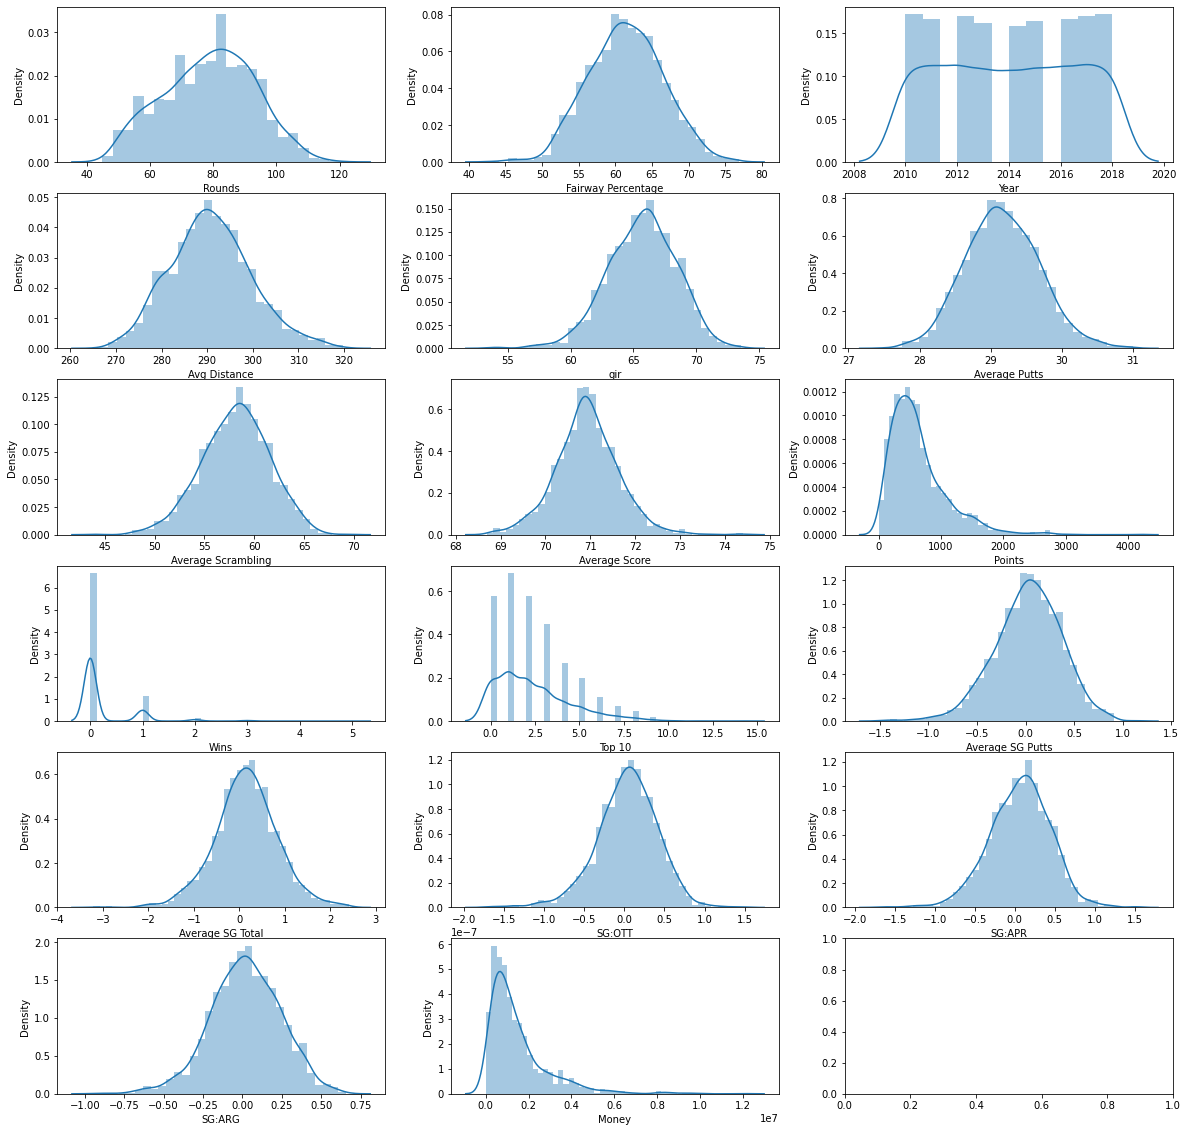

In [13]:
#visualizing distribution for each variable
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
distribution = data.loc[:,data.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(data[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

Wins and No wins per year

In [14]:
#number of players with wins per year
win = data.groupby('Year')['Wins'].value_counts()
win = win.unstack()
win.fillna(0, inplace=True)
win = win.astype(int)

win

Wins,0,1,2,3,4,5
Year,,,,,,
2010,166,21,5,0,0,0
2011,156,25,5,0,0,0
2012,159,26,4,1,0,0
2013,152,24,3,0,0,1
2014,142,29,3,2,0,0
2015,150,29,2,1,1,0
2016,152,28,4,1,0,0
2017,156,30,0,3,1,0
2018,158,26,5,3,0,0


In [15]:
#percentages of players without wins per year
players = win.apply(lambda x: np.sum(x), axis=1)
percent_no_win = win[0]/players
percent_no_win = percent_no_win*100
percent_no_win

Year
2010    86.458333
2011    83.870968
2012    83.684211
2013    84.444444
2014    80.681818
2015    81.967213
2016    82.162162
2017    82.105263
2018    82.291667
dtype: float64

Text(0.5, 1.0, 'Percentage of Players without a Win')

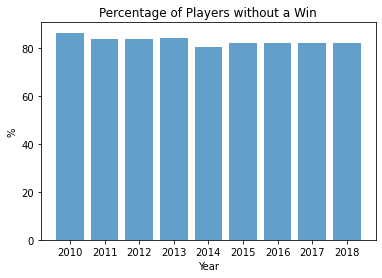

In [21]:
#bar chart of percent with no wins
fig, ax = plt.subplots()
bar_width = 0.8
opacity = 0.7 
index = np.arange(2010, 2019)

plt.bar(index, percent_no_win, bar_width, alpha = opacity)
plt.xticks(index)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Percentage of Players without a Win')

In [17]:
data['Wins'].value_counts()

0    1391
1     238
2      31
3      11
4       2
5       1
Name: Wins, dtype: int64

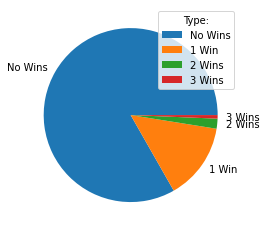

In [20]:
import matplotlib.pyplot as plt
pie_chart=np.array([1391,238, 31,11])
lab=['No Wins','1 Win', '2 Wins', '3 Wins']
plt.pie(pie_chart,labels=lab)
plt.legend(title = "Type:")
plt.show()

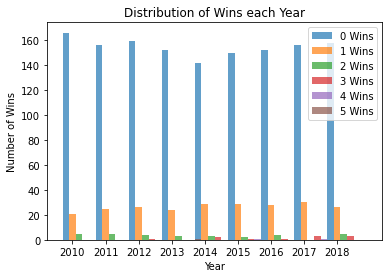

In [22]:
# visualizing the number of wins on a bar chart 
fig, ax = plt.subplots()
index = np.arange(2010, 2019)
bar_width = 0.2
opacity = 0.7 

def bar_plot(index, win, labels):
    plt.bar(index, win, bar_width, alpha=opacity, label=labels)

# Plotting the bars
rects = bar_plot(index, win[0], labels = '0 Wins')
rects1 = bar_plot(index + bar_width, win[1], labels = '1 Wins')
rects2 = bar_plot(index + bar_width*2, win[2], labels = '2 Wins')
rects3 = bar_plot(index + bar_width*3, win[3], labels = '3 Wins')
rects4 = bar_plot(index + bar_width*4, win[4], labels = '4 Wins')
rects5 = bar_plot(index + bar_width*5, win[5], labels = '5 Wins')

plt.xticks(index + bar_width, index)
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Distribution of Wins each Year')
plt.legend()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wins', ylabel='Density'>

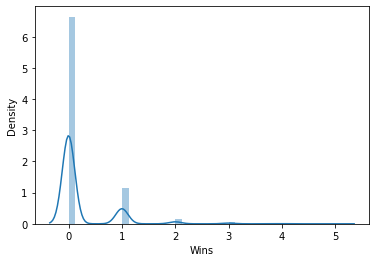

In [22]:
sns.distplot(data['Wins'])

In [23]:
#percentages of players who did not place in the top 10 per year
top_10 = data.groupby('Year')['Top 10'].value_counts()
top_10 = top_10.unstack()
top_10.fillna(0, inplace=True)
players = top_10.apply(lambda x: np.sum(x), axis=1)

no_top_10 = top_10[0]/players * 100
no_top_10

Year
2010    17.187500
2011    25.268817
2012    23.157895
2013    18.888889
2014    16.477273
2015    18.579235
2016    20.000000
2017    15.789474
2018    17.187500
dtype: float64

Exploring data

In [23]:
#looking at the furthest hitters
distance = data[['Year','Player Name','Avg Distance']].copy()
distance.sort_values(by='Avg Distance', inplace=True, ascending=False)
distance.head()

,Year,Player Name,Avg Distance
162,2018,Rory McIlroy,319.7
1481,2011,J.B. Holmes,318.4
174,2018,Trey Mullinax,318.3
732,2015,Dustin Johnson,317.7
350,2017,Rory McIlroy,316.7


In [27]:
#seeing who made the most money
earnings_ranking = data[['Year','Player Name','Money']].copy()
earnings_ranking.sort_values(by='Money', inplace=True, ascending=False)
earnings_ranking

,Year,Player Name,Money
647,2015,Jordan Spieth,12030465.0
361,2017,Justin Thomas,9921560.0
303,2017,Jordan Spieth,9433033.0
729,2015,Jason Day,9403330.0
520,2016,Dustin Johnson,9365185.0
...,...,...,...
1173,2012,Kyle Thompson,45460.0
183,2018,Andrew Yun,41566.0
543,2016,Robert Allenby,25271.0
79,2018,Kyle Thompson,24878.0


In [28]:
#who made the most money each year
money_rank = earnings_ranking.groupby('Year')['Money'].max()
money_rank = pd.DataFrame(money_rank)
print(money_rank.iloc[0,0])

indexs = np.arange(2010, 2019)
names = []
for i in range(money_rank.shape[0]):
    temp = data.loc[data['Money'] == money_rank.iloc[i,0],'Player Name']
    names.append(str(temp.values[0]))

money_rank['Player Name'] = names
print(money_rank)

4910477.0
           Money     Player Name
Year                            
2010   4910477.0     Matt Kuchar
2011   6683214.0     Luke Donald
2012   8047952.0    Rory McIlroy
2013   8553439.0     Tiger Woods
2014   8280096.0    Rory McIlroy
2015  12030465.0   Jordan Spieth
2016   9365185.0  Dustin Johnson
2017   9921560.0   Justin Thomas
2018   8694821.0   Justin Thomas


Index(['Rounds', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG',
       'Money'],
      dtype='object')


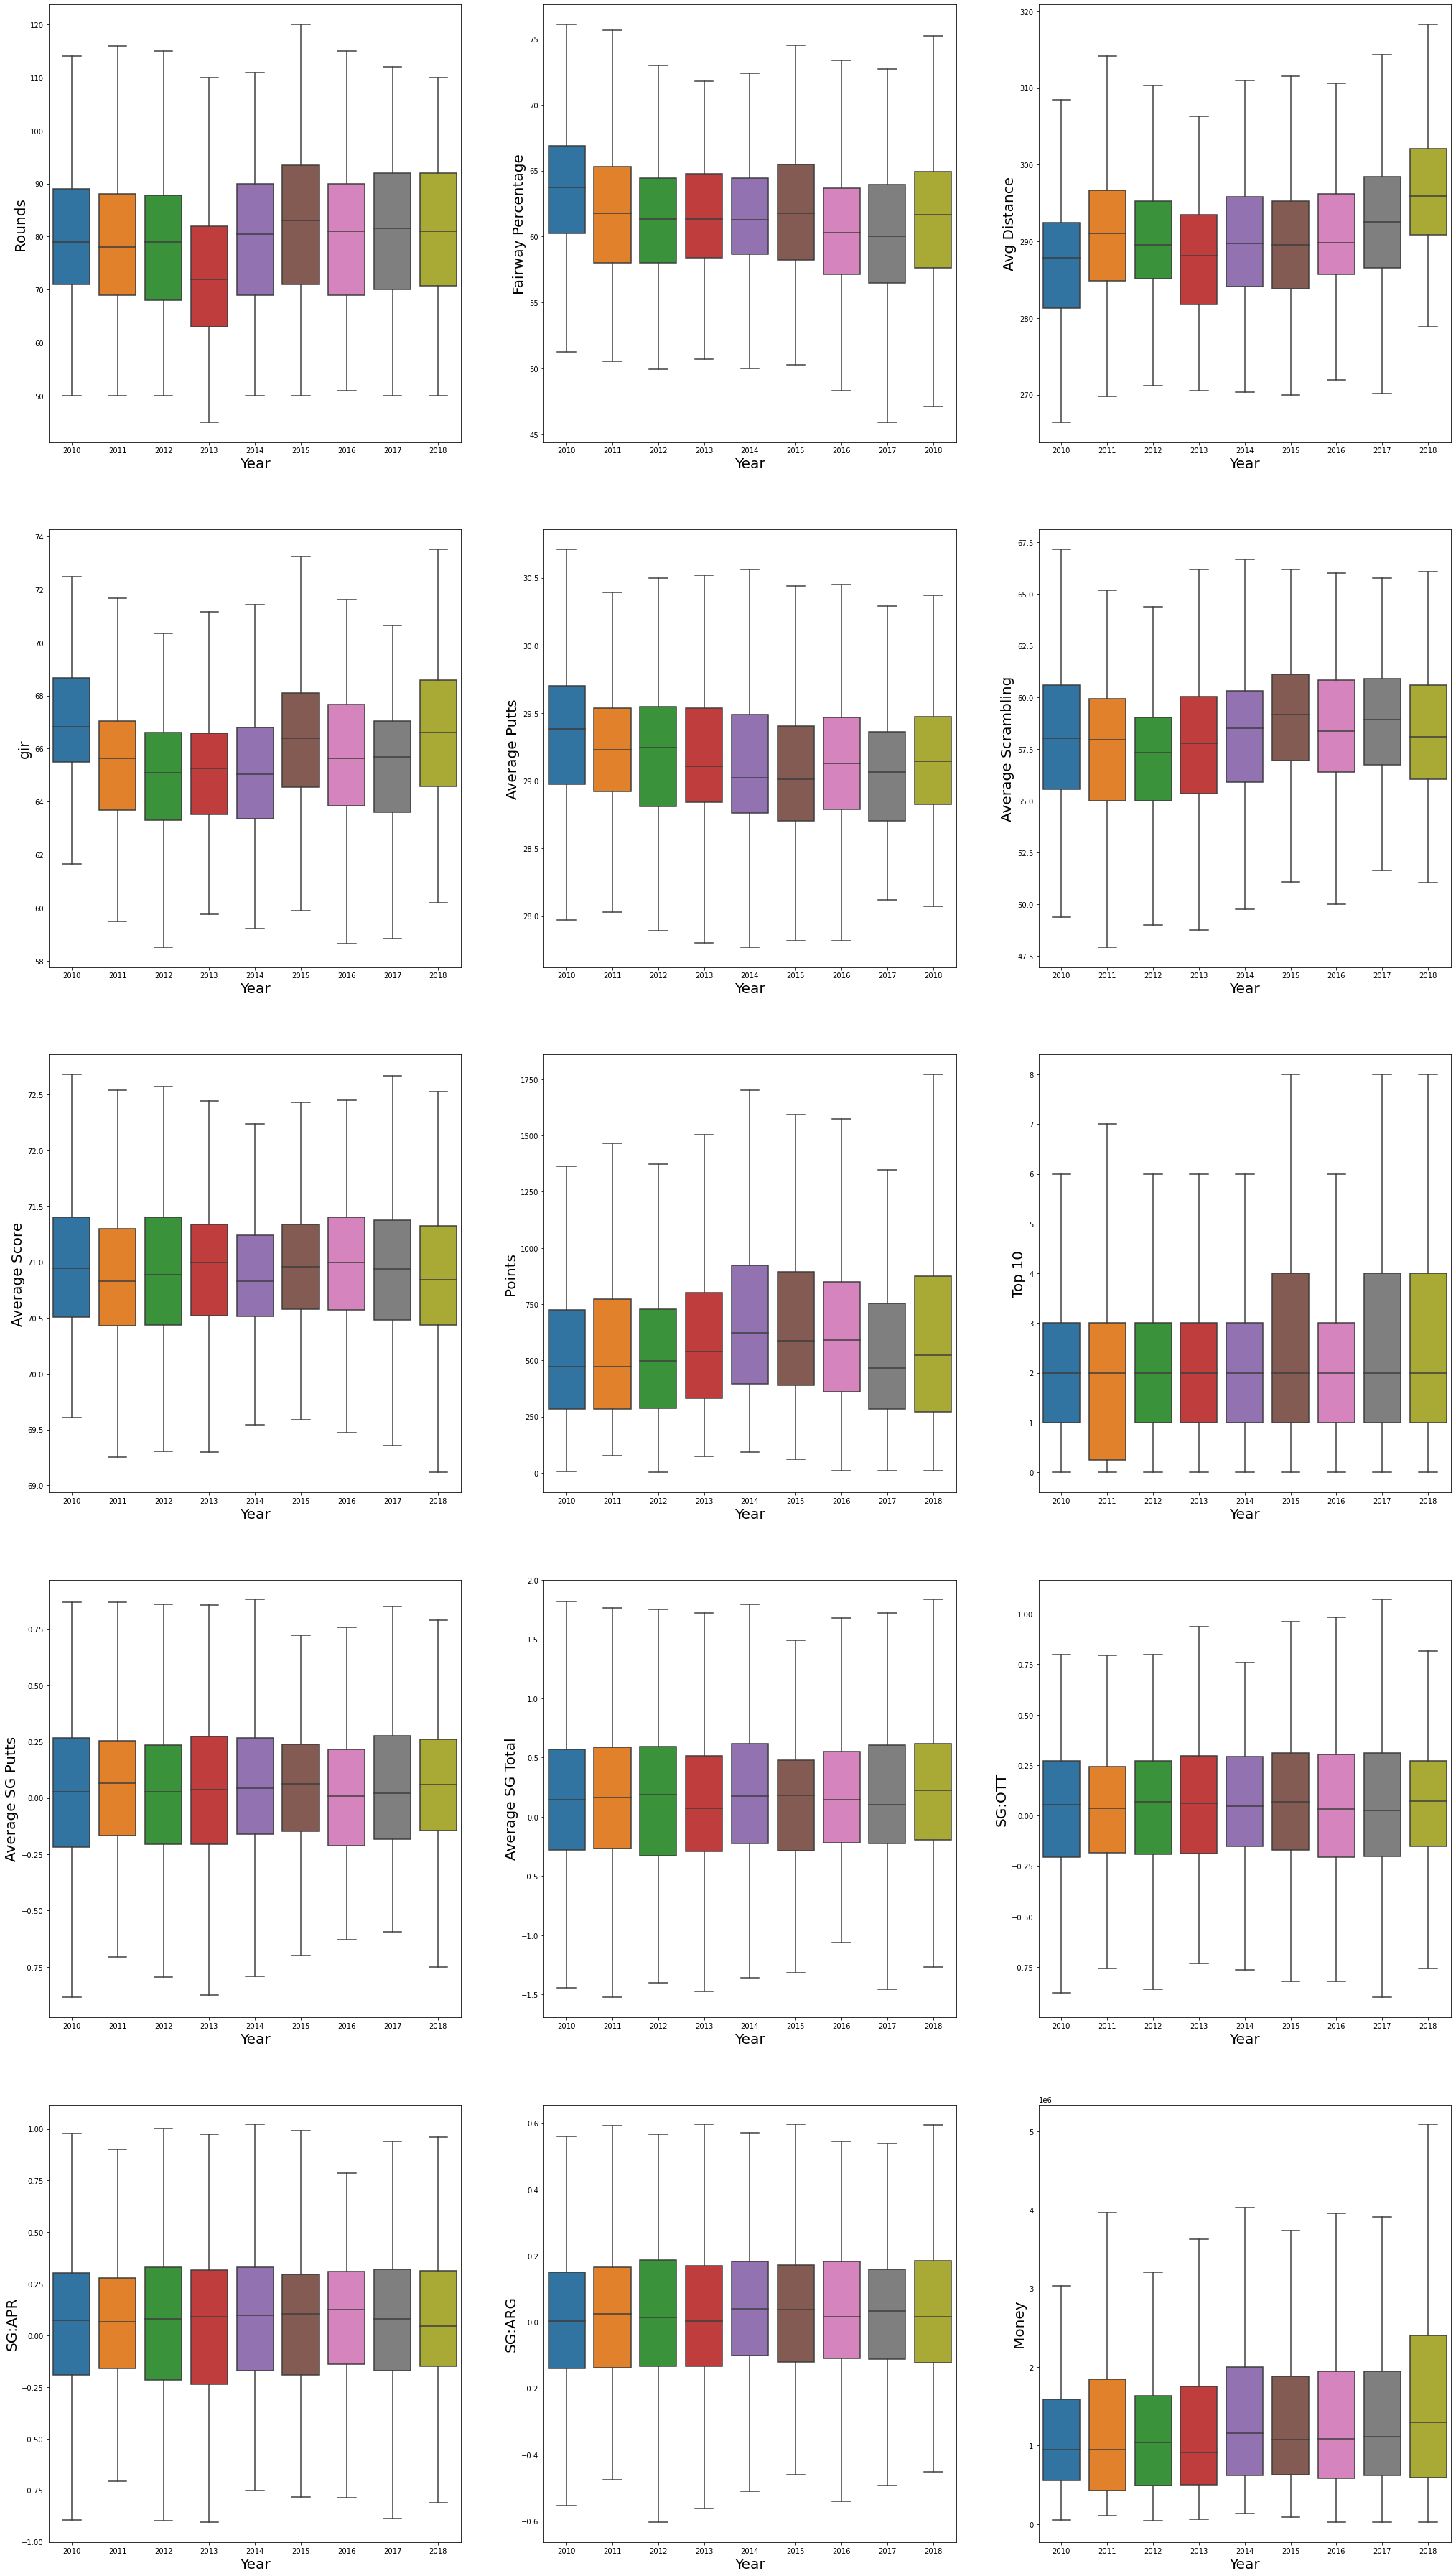

In [29]:
#changes in stats over time
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
distribution = data.loc[:,(data.columns!='Player Name') & (data.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, data=data, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

Analyzing winners

In [24]:
# seeing the players that had a win or more in each year 
winner = data.loc[data['Wins'] >= 1, :]
winner.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
16,Billy Horschel,86,67.80,2018,295.4,71.75,29.46,58.03,70.154,960,1,3,0.392,1.112,0.538,0.352,-0.169,4315200.0
22,"Ted Potter, Jr.",87,66.83,2018,286.0,63.03,28.45,57.51,71.024,744,1,1,0.074,-0.094,-0.074,-0.200,0.105,1976198.0
23,Austin Cook,107,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060,1,3,0.315,0.569,0.120,-0.045,0.179,2448920.0
27,Ian Poulter,73,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030,1,4,0.223,0.850,0.141,0.435,0.051,2714450.0


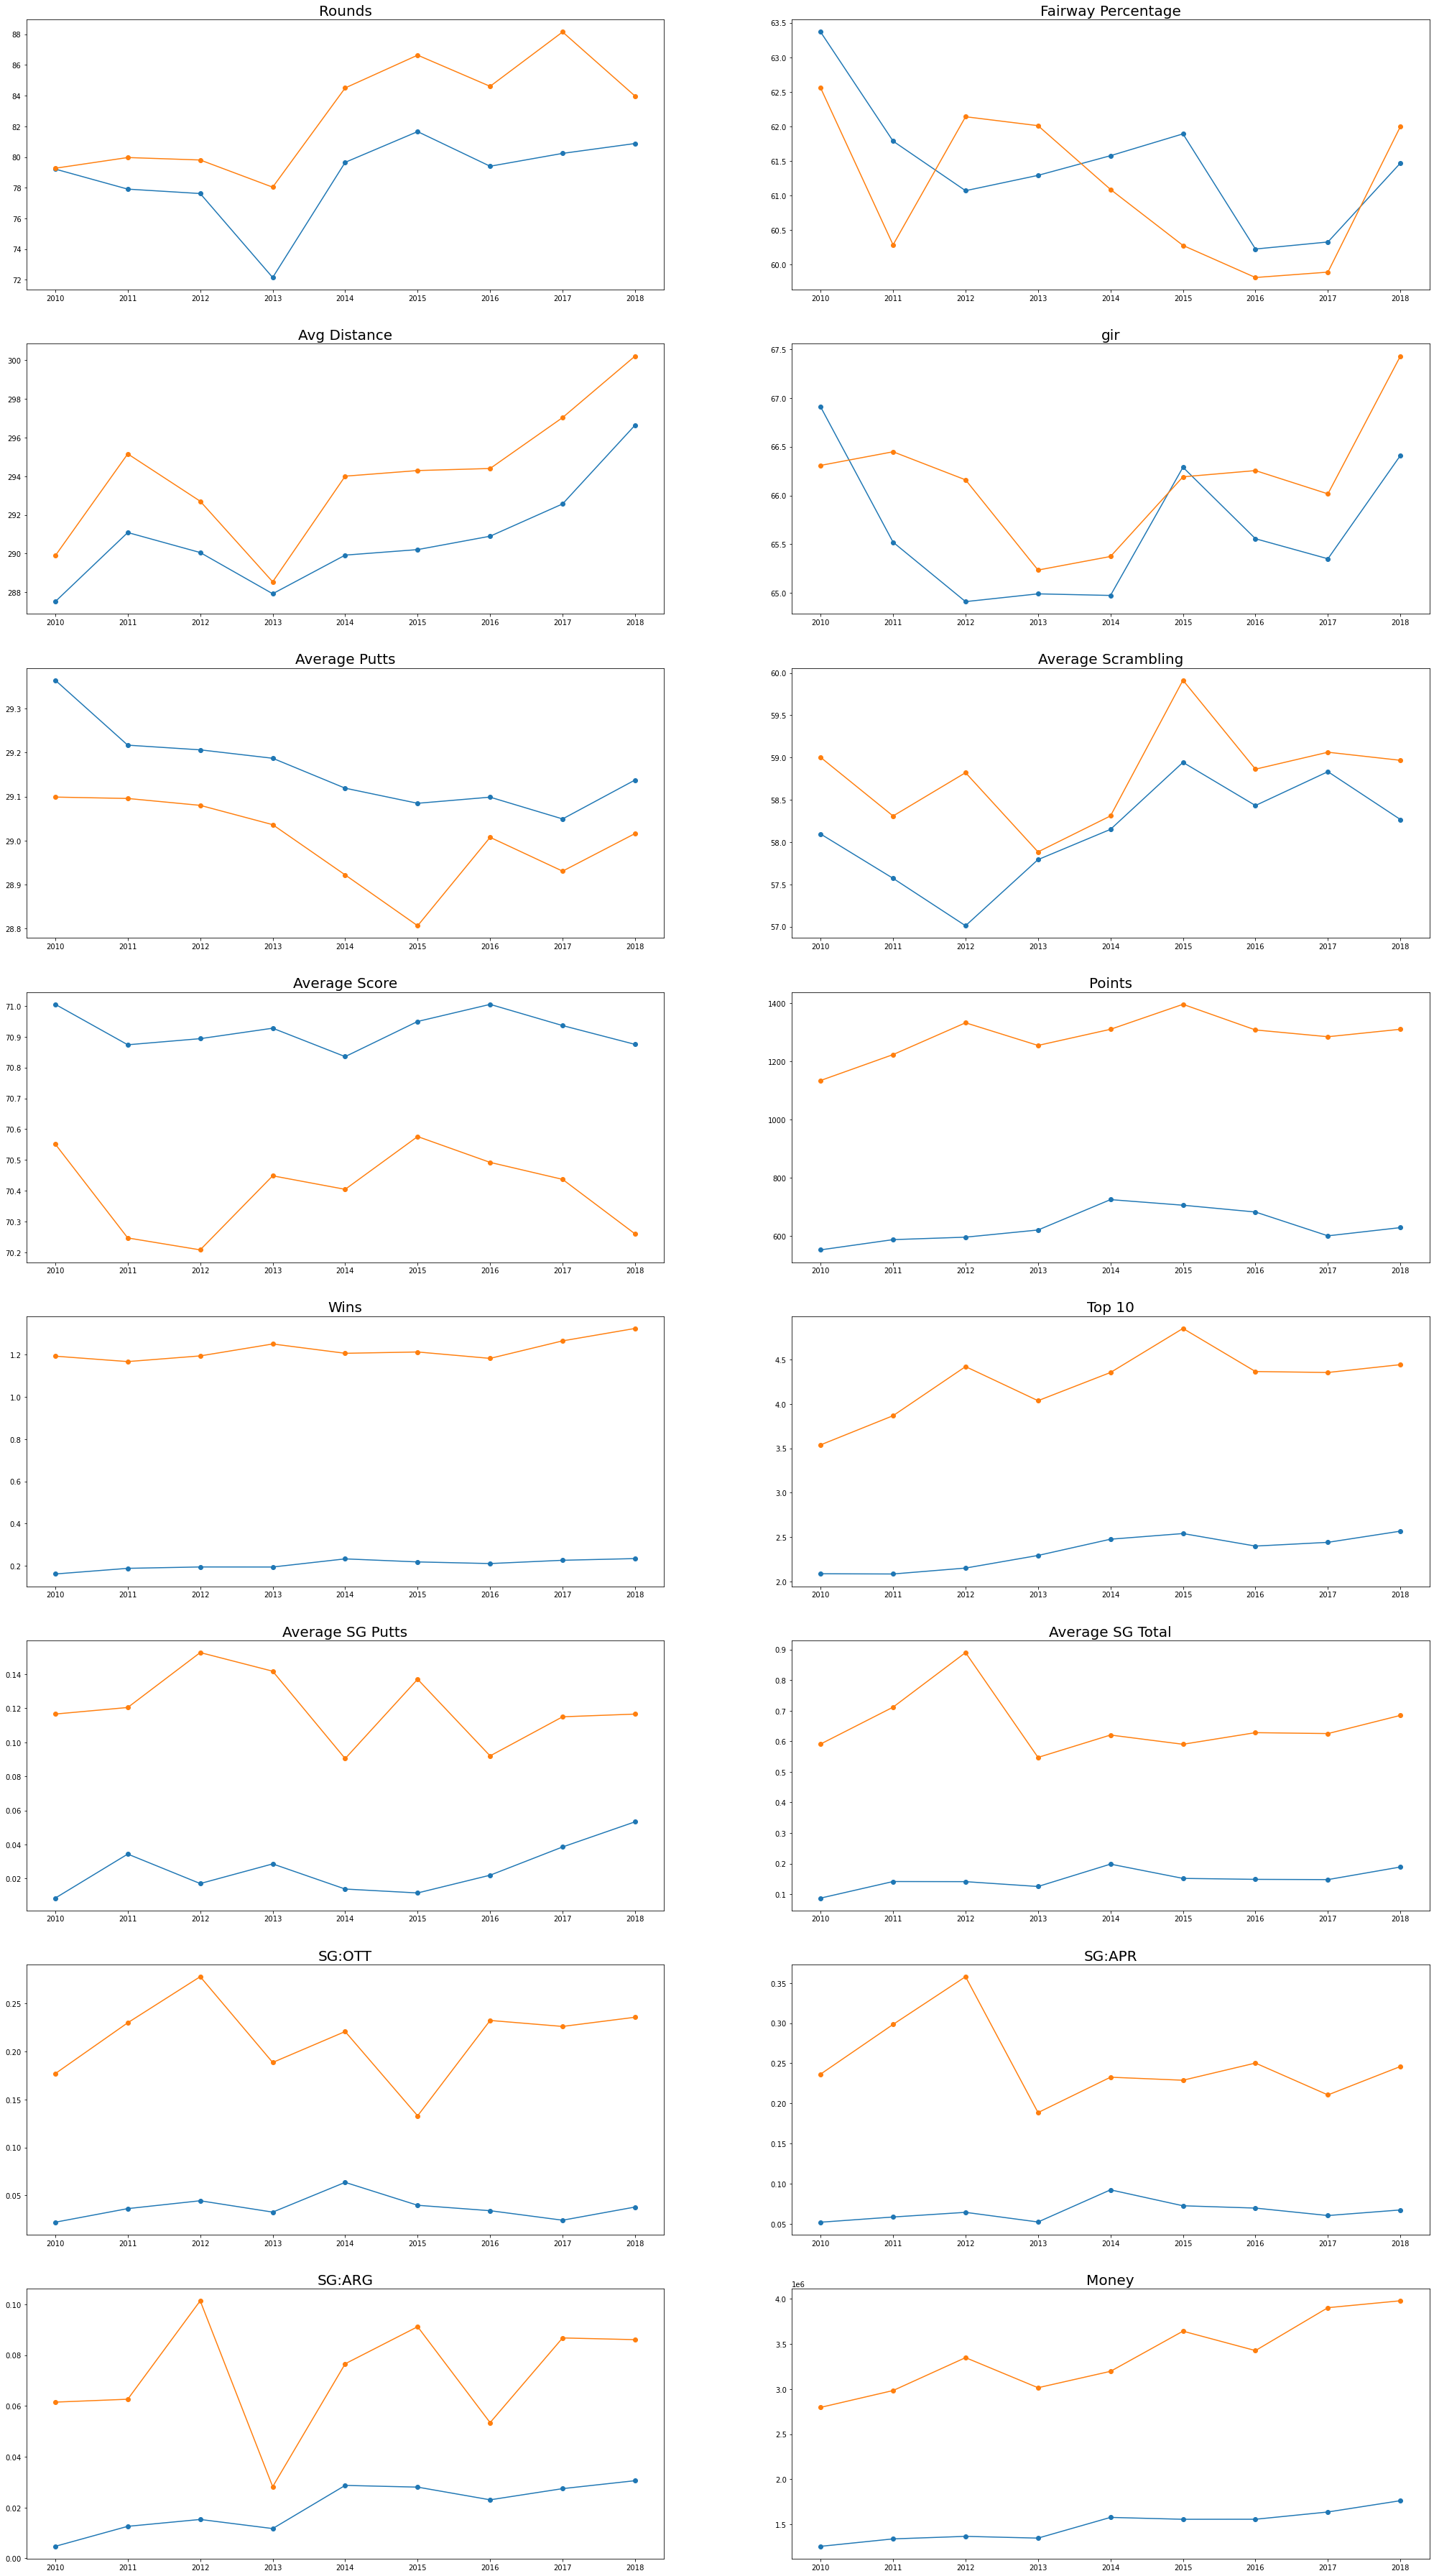

In [43]:
#comparing winners to average players
f, ax = plt.subplots(nrows = 8, ncols = 2, figsize=(35,65))
distribution = data.loc[:,data.columns!='Player Name'].columns
distribution = distribution[distribution != 'Year']

rows = 0
cols = 0
lower_better = ['Average Putts', 'Average Score']
for i, column in enumerate(distribution):
    avg = data.groupby('Year')[column].mean()
    best = winner.groupby('Year')[column].mean()
    ax[rows,cols].plot(avg, 'o-',)
    ax[rows,cols].plot(best, 'o-',)
    ax[rows,cols].set_title(column, fontsize = 20)
    
    cols += 1
    if cols == 2:
        cols = 0
        rows += 1

Correlation between variables

<AxesSubplot:>

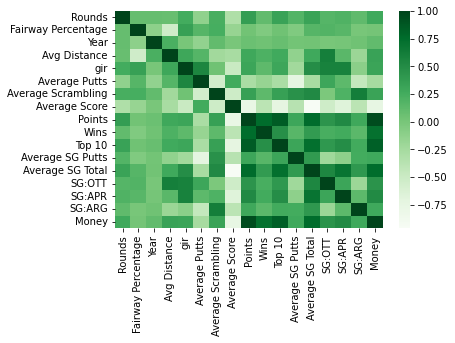

In [47]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='Greens')       

In [48]:
data.corr()['Wins']

Rounds                0.103162
Fairway Percentage   -0.047949
Year                  0.039006
Avg Distance          0.206294
gir                   0.120340
Average Putts        -0.168764
Average Scrambling    0.125193
Average Score        -0.390254
Points                0.750110
Wins                  1.000000
Top 10                0.473453
Average SG Putts      0.149155
Average SG Total      0.384932
SG:OTT                0.232414
SG:APR                0.259363
SG:ARG                0.134948
Money                 0.721665
Name: Wins, dtype: float64

Classification

In [30]:
# Importing the Machine Learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

if __name__ == '__main__':
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', category=ImportWarning)

NameError: name 'warnings' is not defined

In [31]:
#adding winner column to determine if a player won or not
data['Winner'] = data['Wins'].apply(lambda x: 1 if x>0 else 0)

#new dataframe with winner column
data2 = data.copy()

# y-value for machine learning is winner column
target = data['Winner']

#dropping the columns Player Name, Wins, and Winner from the dataframe
data2.drop(['Player Name','Wins','Winner'], axis=1, inplace=True)
print(data2.head())

   Rounds  Fairway Percentage  Year  Avg Distance    gir  Average Putts  \
0      60               75.19  2018         291.5  73.51          29.93   
1     109               73.58  2018         283.5  68.22          29.31   
2      93               72.24  2018         286.5  68.67          29.12   
3      78               71.94  2018         289.2  68.80          29.17   
4     103               71.44  2018         278.9  67.12          29.11   

   Average Scrambling  Average Score  Points  Top 10  Average SG Putts  \
0               60.67         69.617     868       5            -0.207   
1               60.13         70.758    1006       3            -0.058   
2               62.27         70.432    1020       3             0.192   
3               64.16         70.015     795       5            -0.271   
4               59.23         71.038     421       3             0.164   

   Average SG Total  SG:OTT  SG:APR  SG:ARG      Money  
0             1.153   0.427   0.960  -0.027  26

Logistic Regression

In [32]:
per_no_win = target.value_counts()[0] / (target.value_counts()[0] + target.value_counts()[1])
per_no_win = per_no_win.round(4)*100
print(str(per_no_win)+str('%'))

83.09%


In [33]:
# creating function for the logisitic regression 
def log_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data = cf_mat)
    print(confusion)
    
    print(classification_report(y_test, y_pred))
    
    # Returning the 5 important features 
    rfe = RFE(clf, 5)
    rfe = rfe.fit(X, y)
    print('Feature Importance')
    print(X.columns[rfe.ranking_ == 1].values)
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [35]:
log_reg(data2, target)

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.91
     0   1
0  345   8
1   28  38
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       353
           1       0.83      0.58      0.68        66

    accuracy                           0.91       419
   macro avg       0.88      0.78      0.81       419
weighted avg       0.91      0.91      0.91       419



TypeError: __init__() takes 2 positional arguments but 3 were given

SVM 

In [36]:
def svc_class(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    svclassifier = SVC(kernel='rbf', C=10000)  
    svclassifier.fit(X_train_scaled, y_train) 
    y_pred = svclassifier.predict(X_test_scaled) 
    print('Accuracy of SVM on training set: {:.2f}'
         .format(svclassifier.score(X_train_scaled, y_train)))
    print('Accuracy of SVM classifier on test set: {:.2f}'
         .format(svclassifier.score(X_test_scaled, y_test)))

    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [37]:
svc_class(data2, target)

Accuracy of SVM on training set: 1.00
Accuracy of SVM classifier on test set: 0.91
ROC AUC Score: 0.84


Random Forest

In [41]:
def random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    clf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data = cf_mat)
    print(confusion)
    
    print(classification_report(y_test, y_pred))
    
    # Returning the 5 important features 
    rfe = RFE(clf, 5)
    rfe = rfe.fit(X, y)
    print('Feature Importance')
    print(X.columns[rfe.ranking_ == 1].values)
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [42]:
random_forest(data2, target)

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.94
     0   1
0  343  10
1   16  50
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       353
           1       0.83      0.76      0.79        66

    accuracy                           0.94       419
   macro avg       0.89      0.86      0.88       419
weighted avg       0.94      0.94      0.94       419



TypeError: __init__() takes 2 positional arguments but 3 were given

Regression Prep

In [61]:
earning_data = data.copy()

#y-value for machine learning is the Money column
target = earning_data['Money']

#dropping the columns Player Name, Wins, Winner, Points, Top 10, and Money from the dataframe
earning_data.drop(['Player Name','Wins','Winner','Points','Top 10','Money'], axis=1, inplace=True)

print(earning_data.head())

   Rounds  Fairway Percentage  Year  Avg Distance    gir  Average Putts  \
0      60               75.19  2018         291.5  73.51          29.93   
1     109               73.58  2018         283.5  68.22          29.31   
2      93               72.24  2018         286.5  68.67          29.12   
3      78               71.94  2018         289.2  68.80          29.17   
4     103               71.44  2018         278.9  67.12          29.11   

   Average Scrambling  Average Score  Average SG Putts  Average SG Total  \
0               60.67         69.617            -0.207             1.153   
1               60.13         70.758            -0.058             0.337   
2               62.27         70.432             0.192             0.674   
3               64.16         70.015            -0.271             0.941   
4               59.23         71.038             0.164             0.062   

   SG:OTT  SG:APR  SG:ARG  
0   0.427   0.960  -0.027  
1  -0.012   0.213   0.194  
2   0.18

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [63]:
def linear_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = LinearRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('R-Squared on training set: {:.3f}'
          .format(clf.score(X_train, y_train)))
    print('R-Squared on test set {:.3f}'
          .format(clf.score(X_test, y_test)))
    
    print('linear model coeff (w):\n{}'
         .format(clf.coef_))
    print('linear model intercept (b): {:.3f}'
         .format(clf.intercept_))

In [64]:
linear_reg(earning_data, target)

R-Squared on training set: 0.601
R-Squared on test set 0.640
linear model coeff (w):
[    5596.7147119      3888.01470514    29923.09760851    17645.92304676
   -19456.82389588  -512051.79339988   -53537.61424529  -708935.63288728
  1780737.55094366 -1367614.7970086   2210424.45790616  2307608.08295936
  2207460.78052006]
linear model intercept (b): 4887933.950


In [65]:
# Using the Linear Regression to predict Tiger Wood's Earnings based on the Model
def find_earning(X,y,name,year):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    clf = Ridge().fit(X_train, y_train)
    y_pred = clf.predict(X)
    y_pred = pd.Series(y_pred)

    pred_data = pd.concat([X, y_pred], axis=1)
    pred_name = pd.concat([pred_data, df['Player Name']], axis=1)

    return pred_name.loc[(pred_name['Player Name']==name) & (pred_name['Year']==year), 0]

In [ ]:
data2 = data3.copy()
poly = PolynomialFeatures(2)
poly = poly.fit(data2)
poly_feature = poly.transform(data2)
print(poly_feature.shape)

#DataFrame with the polynomial features 
poly_feature = pd.DataFrame(poly_feature, columns = poly.get_feature_names(ml_df.columns))
print(poly_feature.head())

In [ ]:
print('Tiger Woods\' Predicted Earning: ' + 
      str(find_earning(X = poly_earning, y = target, name = 'Tiger Woods', year = 2013).values[0]))

# Tiger Wood's actual earnings in 2018 
tw13 = df.loc[(df['Player Name']=='Tiger Woods') & (df['Year']==2013), 'Money']
print('Tiger Woods\' Actual Earning: ' + str(tw13.values[0]))